# Calculating Extreme Heat days using daily projections from Cal-Adapt API

#### Step 1. Download data

In [1]:
# A 'magic' command to display plots inline
%matplotlib inline

# Import all python modules. You need to run this cell for the other cells to work.
import requests 
import numpy as np
import pandas as pd
from datetime import datetime
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

----
## Step 1. Download data
----

### 1a. Defining your area of interest

The `g` geometry parameter is used to download data for a point, line or polygon. Geometry can be written in various formats including WKT, GeoJSON, KML. The examples below use WKT (Well Known Text) format.

#### To get data for a grid cell ...

In [2]:
city = 'San Joaquin Valley'
#point = 'POINT(-121.4687 38.5938)' # Sacramento
point = 'POINT(-120.1106 36.3744)'  # San Joaquin Valley

In [3]:
# Cal-Adapt API
api = 'http://api.cal-adapt.org/api'

# Name of boundary layer in API (Census Tracts)
resource = 'locagrid'

#Get ID
url = api + '/' + resource + '/?intersects=' +  point

response = requests.get(url)
county = response.json()
county = county['features'][0]
id  = county['id']
#location = 'Census Tract ID ' + str(county['properties']['tract'])
print ("ID is", id)
#print("location is", location)

ID is 43186


### 1b. Download observed daily tasmax

Daily data is stored as a multiband raster, e.g. observed daily timeseries (1950 -2013) has 23376 bands with each band corresponding to one day, starting from 1950-01-01. Units for the observed data are degrees Celsius and projected data are in Kelvin.

The code in the next cell contains a bunch of functions to:
    - fetch daily data given an ID
    - return a new Pandas dataframe that contains all the data

In [4]:
# Cal-Adapt API
api = 'http://api.cal-adapt.org/api'
# Request header
headers = {'ContentType': 'json'}

def process_daily_data(slug):
    # Make request
    url = api + '/series/' + slug + '/events/?ref=/api/' + resource + '/%s/&imperial=TRUE&stat=mean' % id
    response = requests.get(url)
    #print(response)
    # Get data
    if response.ok:
        data = response.json()
        df = pd.DataFrame(data)
        df.set_index('index', inplace = True)
        df.index = pd.to_datetime(df.index)
    else:
        print('Failed to download:')
    return df

In [5]:
def get_observed():
    # Create slug
    slug = 'tasmax_day_livneh'
    df = process_daily_data(slug)
    return df

In [6]:
observedDF = get_observed()
observedDF

,name,data
index,,
1950-01-01 00:00:00+00:00,tasmax_day_livneh,46.872498
1950-01-02 00:00:00+00:00,tasmax_day_livneh,46.359501
1950-01-03 00:00:00+00:00,tasmax_day_livneh,42.215000
1950-01-04 00:00:00+00:00,tasmax_day_livneh,42.781998
1950-01-05 00:00:00+00:00,tasmax_day_livneh,48.222504
1950-01-06 00:00:00+00:00,tasmax_day_livneh,53.181499
1950-01-07 00:00:00+00:00,tasmax_day_livneh,54.468498
1950-01-08 00:00:00+00:00,tasmax_day_livneh,53.392998
1950-01-09 00:00:00+00:00,tasmax_day_livneh,53.415497


### 1c. Download projected daily tasmax

The projected daily timeseries are form 2006 - 2099/2100 and units are in degrees Kelvin. You can easily modify the code to add/subtract models, scenarios, climate variables

In [7]:
def get_projections():
    # Create an empty list to hold dataframes
    df_list = []

    # Make a combined list of GCMs, scenarios, climate variables for looping
    climvar = ['tasmax']
    period = ['day']
    models = ['CanESM2', 'CNRM-CM5', 'HadGEM2-ES', 'MIROC5']
    #scenarios = ['rcp45', 'rcp85', 'historical]
    scenarios = ['historical', 'rcp85', ]
    zipped = itertools.product(climvar, period, models, scenarios)
    
    # Loop through zipped
    for item in zipped:
        # Create slug
        slug = '_'.join(item)
        df = process_daily_data(slug)
        df_list.append(df)
            
    # Combine all the dataframes into one and return
    return pd.concat(df_list)

In [8]:
df = get_projections()
df

,name,data
index,,
1950-01-01 00:00:00+00:00,tasmax_day_CanESM2_historical,62.818573
1950-01-02 00:00:00+00:00,tasmax_day_CanESM2_historical,62.514801
1950-01-03 00:00:00+00:00,tasmax_day_CanESM2_historical,59.902527
1950-01-04 00:00:00+00:00,tasmax_day_CanESM2_historical,48.215927
1950-01-05 00:00:00+00:00,tasmax_day_CanESM2_historical,47.420357
1950-01-06 00:00:00+00:00,tasmax_day_CanESM2_historical,51.144608
1950-01-07 00:00:00+00:00,tasmax_day_CanESM2_historical,54.972412
1950-01-08 00:00:00+00:00,tasmax_day_CanESM2_historical,58.808891
1950-01-09 00:00:00+00:00,tasmax_day_CanESM2_historical,53.652351


In [9]:
# Keep only required parameters in slug
df['Climate Data'] = df['name'].str.split('_', expand=True)[2] 
df.index.name = 'Date'
df.drop(columns= 'name', inplace = True)
df.head()

,data,Climate Data
Date,,
1950-01-01 00:00:00+00:00,62.818573,CanESM2
1950-01-02 00:00:00+00:00,62.514801,CanESM2
1950-01-03 00:00:00+00:00,59.902527,CanESM2
1950-01-04 00:00:00+00:00,48.215927,CanESM2
1950-01-05 00:00:00+00:00,47.420357,CanESM2


In [10]:
df = df.pivot_table( values = 'data', index = 'Date', columns = 'Climate Data')

In [11]:
df.tail()

Climate Data,CNRM-CM5,CanESM2,HadGEM2-ES,MIROC5
Date,,,,
2100-12-27 00:00:00+00:00,67.986923,68.981796,NaN,NaN
2100-12-28 00:00:00+00:00,65.522858,70.731033,NaN,NaN
2100-12-29 00:00:00+00:00,68.131775,70.941643,NaN,NaN
2100-12-30 00:00:00+00:00,75.669495,62.027115,NaN,NaN
2100-12-31 00:00:00+00:00,69.535721,59.304047,NaN,NaN


In [12]:
month = 'July'
df = df[df.index.month == 7]

In [13]:
historical = df.loc['1961-01-01':'1990-12-31']
proj = df.loc['2021-01-01':'2050-12-31']

In [14]:
pd.Series(df.values.ravel('F')).head()

0    99.740761
1    92.123886
2    87.621750
3    85.553024
4    87.451401
dtype: float64

In [15]:
# Stack all 4 GCM's into one
stacked_hist = pd.Series(historical.values.ravel('F'))
stacked_proj = pd.Series(proj.values.ravel('F'))

In [16]:
stacked_hist.head()

0    103.516273
1     98.182899
2     90.760544
3     93.579742
4     98.046013
dtype: float64

In [17]:
stacked_hist.describe()

count    3720.000000
mean       97.649821
std         5.955071
min        73.650269
25%        93.635952
50%        98.316498
75%       102.240206
max       113.473343
dtype: float64

In [18]:
stacked_proj.describe()

count    3720.000000
mean      101.664700
std         5.967246
min        77.657860
25%        97.651617
50%       102.069645
75%       106.174976
max       118.698494
dtype: float64

In [19]:
len(stacked_hist)

3720

In [20]:
directory = r'C:\Users\lkaur\Work summer 2019\tasmax_San_Joquan_avg.csv'
excel_file = df.to_csv(directory, header=True) 

In [21]:
# Create bins and labels for the data

bins = []
labels = []
# To get range from 73 to 120 with 0.5 interval
for i in range(146,240, 1):
    bins.append(i/2)
    labels.append(i/2 + 0.5)
del labels[-1]

In [22]:
len(bins)

94

In [23]:
len(labels)

93

In [24]:
#labels = bins
hist_binned = pd.cut(stacked_hist, bins, labels = labels)
#hist_binned = pd.cut(historical['avg'], len(bins))
proj_binned = pd.cut(stacked_proj, bins, labels = labels)

In [25]:
print(hist_binned.head())
print(proj_binned.head())

0    104.0
1     98.5
2     91.0
3     94.0
4     98.5
dtype: category
Categories (93, float64): [73.5 < 74.0 < 74.5 < 75.0 ... 118.0 < 118.5 < 119.0 < 119.5]
0     91.5
1    100.0
2    101.5
3    102.5
4    107.5
dtype: category
Categories (93, float64): [73.5 < 74.0 < 74.5 < 75.0 ... 118.0 < 118.5 < 119.0 < 119.5]


In [26]:
# Find frequency of each bin #1 Count the total number when each bin occurs. #2 Divide it by total data points #3 mulitply by 100
hist_freq = (hist_binned.groupby(hist_binned).count())/(stacked_hist.size)*100
proj_freq = (proj_binned.groupby(proj_binned).count())/(stacked_proj.size)*100
#grouped = s.groupby(s)

In [27]:
hist_freq.head(3)

73.5    0.000000
74.0    0.026882
74.5    0.000000
dtype: float64

In [28]:
proj_freq.head(3)

73.5    0.0
74.0    0.0
74.5    0.0
dtype: float64

In [29]:
# Add the previous frequencies to get total cummulative frequency
hist_cumm = hist_freq.cumsum()
proj_cumm = proj_freq.cumsum()

In [30]:
hist_cumm.tail()

117.5    100.0
118.0    100.0
118.5    100.0
119.0    100.0
119.5    100.0
dtype: float64

In [31]:
proj_cumm.tail()

117.5     99.919355
118.0     99.919355
118.5     99.973118
119.0    100.000000
119.5    100.000000
dtype: float64

bins = []
for i in range(60):
    bins.append(i)

In [32]:
df = pd.DataFrame(
    {'Bin': labels,
     'Hist_Cumm%': hist_cumm,
     'Proj_Cumm%': proj_cumm
    })

In [33]:
#df.set_index('Bin', inplace = True)

In [34]:
df.head()

,Bin,Hist_Cumm%,Proj_Cumm%
73.5,73.5,0.000000,0.0
74.0,74.0,0.026882,0.0
74.5,74.5,0.026882,0.0
75.0,75.0,0.026882,0.0
75.5,75.5,0.053763,0.0


In [35]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [10, 10]

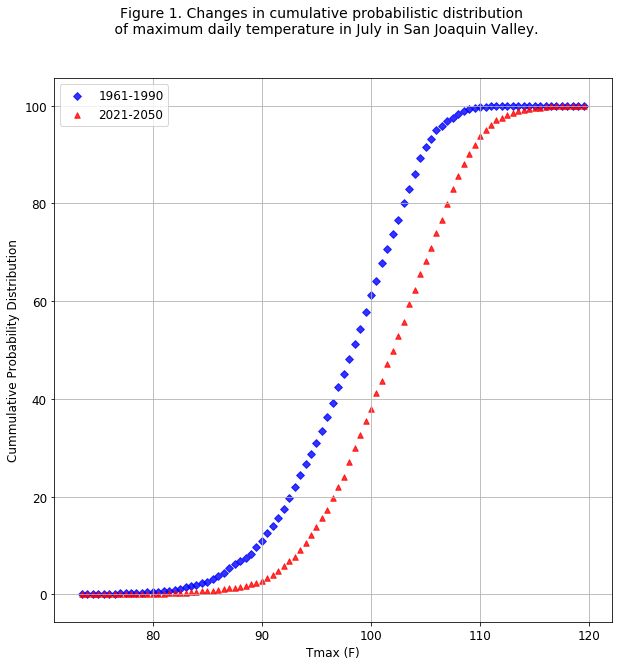

In [36]:
ax = df.plot(kind="scatter", x= "Bin" ,y="Hist_Cumm%", color="b", marker='D', label="1961-1990", alpha = 0.8, s= 30)
df.plot(kind="scatter", x= "Bin" ,y="Proj_Cumm%", color="r", marker='^', label ="2021-2050", ax=ax, alpha = 0.8, s= 30)
plt.grid(True)
#ax.title('Livermore Speeds to Altamont Wind Prodution', weight = 'bold', fontsize = 13)
ax.set_xlabel("Tmax (F)")
ax.set_ylabel("Cummulative Probability Distribution")
plt.suptitle('Figure 1. Changes in cumulative probabilistic distribution \n of maximum daily temperature in ' + month + ' in ' + city + '.', fontsize=14)
plt.show()

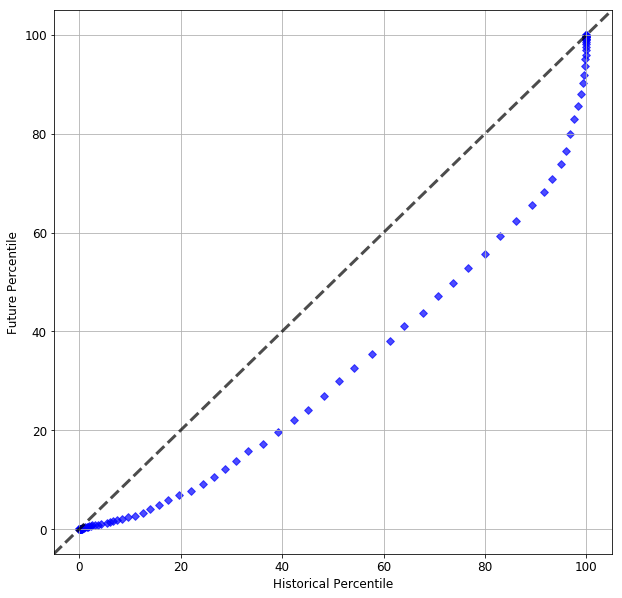

In [37]:
ax = df.plot(kind="scatter", x ="Hist_Cumm%",  y= 'Proj_Cumm%', color="b", marker='D' , alpha = 0.7, s= 30)
#df.plot(kind="scatter", x= "Hist_Cumm%" ,y="Hist_Cumm%", color="r", marker='^', label ="2021-2050", ax=ax, alpha = 0.8, s= 30)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = 'black', alpha = 0.7, ls = 'dashed')
plt.grid(True)
ax.set_xlabel("Historical Percentile")
ax.set_ylabel("Future Percentile")
plt.rcParams['figure.figsize'] = [10, 7]
plt.show()
#plt.suptitle('Figure 1. Changes in cumulative probabilistic distribution \n of maximum daily temperature in ' + month + ' in ' + city + '.', fontsize=14)


In [39]:
hist_proj = pd.DataFrame(
    {
     'stacked_hist': stacked_hist,
     'stacked_proj': stacked_proj
    })

In [40]:
hist_proj = hist_proj.apply(lambda x: x.sort_values().values)

In [41]:
hist_proj.head()

,stacked_hist,stacked_proj
0,73.650269,77.657860
1,75.369247,78.073471
2,76.194702,78.850266
3,76.665085,80.513596
4,76.817017,80.553032


In [42]:
directory = r'C:\Users\lkaur\Work summer 2019\hist_proj_tasmax_San_Joquan_avg.csv'
excel_file = hist_proj.to_csv(directory, header=True) 

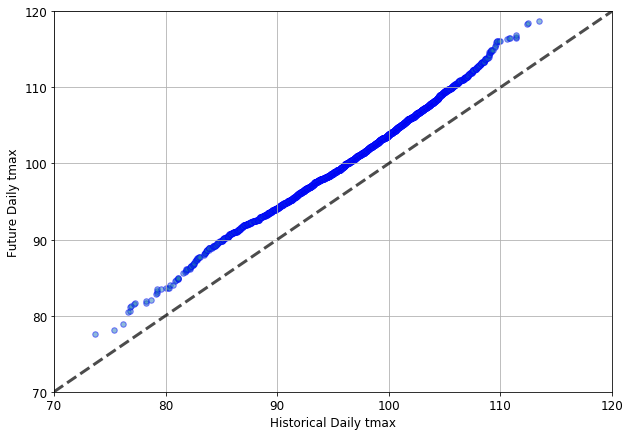

In [43]:
ax = hist_proj.plot(kind="scatter", x ="stacked_hist",  y= 'stacked_proj',  marker='o',  alpha = 0.5, s= 30, facecolors='none', edgecolors='b')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = 'black', alpha = 0.7, ls = 'dashed')
plt.grid(True)
ax.set_xlabel("Historical Daily tmax")
ax.set_ylabel("Future Daily tmax")
plt.ylim(70, 120)
plt.xlim(70,120)
#plt.suptitle('Figure 1. Changes in cumulative probabilistic distribution \n of maximum daily temperature in ' + month + ' in ' + city + '.', fontsize=14)
plt.show()